In [37]:
import pandas as pd
import numpy as np

from scipy import stats

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.manifold import TSNE

## 讀取檔案

In [73]:
""" Your code hear: """
raw = pd.read_csv('train.csv')
train = raw.drop(["Id"],axis=1).copy()
#Y = raw["SalePrice"].copy()

## 取出連續型特徵 (方便降維)

In [74]:
""" Your code hear: """
continual = [f for f in train.columns if train.dtypes[f] != 'object']
df = train[continual]

## 分析缺失值

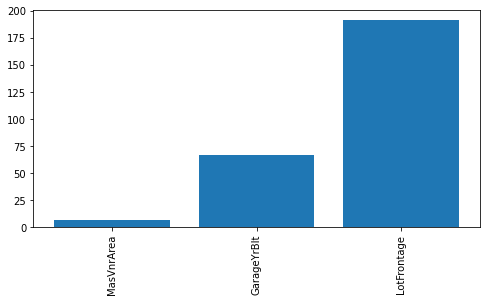

In [75]:
""" Your code hear: 練習印出缺失值圖表 """
missing = df.isnull().sum(axis = 0)
missing = missing[missing > 0]
missing.sort_values(inplace=True)

plt.figure(figsize = (8, 4))
plt.bar(list(missing.index), np.array(missing))
plt.xticks(rotation='vertical')
plt.show()

## 去除缺失值

In [76]:
""" Your code hear: 去除缺失值 """
df = df.dropna(axis=0)
print(df.shape)

(838, 37)


# 轉化成 ndarray 後進行標準化，並將 Y 透過四分位數轉換成四個類別

In [77]:
""" Your code hear: """
x = np.asarray(df)
target = 'SalePrice'
Y = np.asarray(df[target])
#將y分四類，x標準化
Y = pd.qcut(Y,4,labels=[1,2,3,4])
x = (x-x.mean(axis=0))/x.std(axis=0)
print(y1)

[3, 3, 3, 1, 1, ..., 3, 2, 3, 4, 1]
Length: 1095
Categories (4, int64): [1 < 2 < 3 < 4]


## 利用 TSNE 降維

In [78]:
tsne = TSNE(
    n_components=2, init='pca', perplexity = 40, 
    early_exaggeration = 8, learning_rate = 150,
    n_iter = 2000
)
X_tsne = tsne.fit_transform(x)

## 做圖

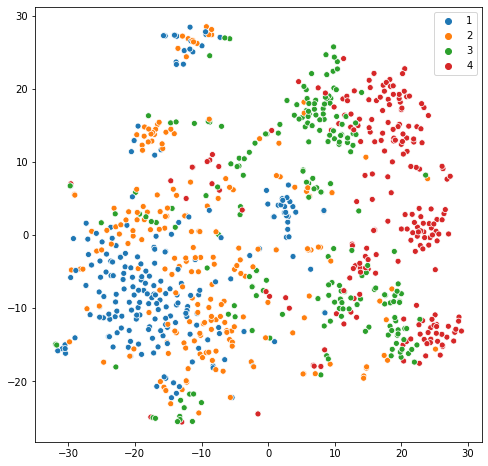

In [84]:
""" Your code hear: """
fig, axes = plt.subplots(figsize=(8,8))
sns.scatterplot(x=X_tsne[:,0], y=X_tsne[:,1], hue=Y)

## 1. 請問同學從降維後的圖表中可以看出什麼現象？

## 2. 請同學分析，什麼因素導致降維後的點座標重合性高？

In [ ]:
1.類別重疊
2.只使用部分連續型的特徵